<h1> * 해당 설문조사를 분석하는 과정에서 데이터사이언스의 필요역량과 앞으로의 공부 방향성등 특정 정보를 얻기 위함이다 <h1>

<h1>캐글러를 대상으로 한 설문조사</h1>

* 설문기간 : 2017년 8월 7일부터 8월 25일까지 </p>
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수  질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정

<h1>데이터 셋<h1>

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [167]:
#현재 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

#각종 필요한 라이브러리 적용
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#경고 표시 무시하기
import warnings
warnings.filterwarnings('ignore')

In [168]:
# 질문스키마 데이터를 가져옴
question = pd.read_csv('./DataSet/schema.csv')
question.shape

(290, 3)

In [169]:
question.head(10)

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
6,LearningDataScience,Are you currently focused on learning data sci...,Non-worker
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
8,CodeWriter,Do you write code to analyze data in your curr...,Worker1
9,CareerSwitcher,Are you actively looking to switch careers to ...,Worker1


In [170]:
# 선다형 객관식(multiple choice) 문제에 대한 응답을 가져옴
mcq = pd.read_csv('./DataSet/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [171]:
#mcq의 열(columns)을 나타냄
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [172]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

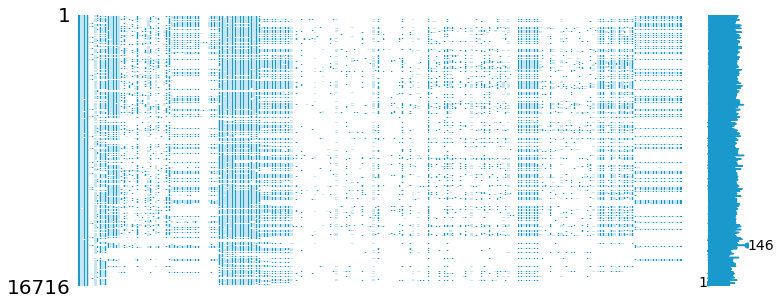

In [173]:
# missingno는 결측지(NaN) 데이터들에 대해 시각화를 해준다
# missingno는 결측데이터를 파악하는데 직관적인 도움을 주는 패키지이다
# 데이터 전처리에서 결측값 처리는 가장 중요한 부분이다
# 결측값과 결측값을 가진 칼럼이 많기 때문에 아래 그래프만으로는 내용을 파악하기 어렵다

import missingno as msno
# msno.matrix(data)로 코딩하고 color 파라미터는 rgb값이다
msno.matrix(mcq, figsize= (12, 5), color=(0.1, 0.6, 0.8))

<h1> 설문통계 </h1>

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

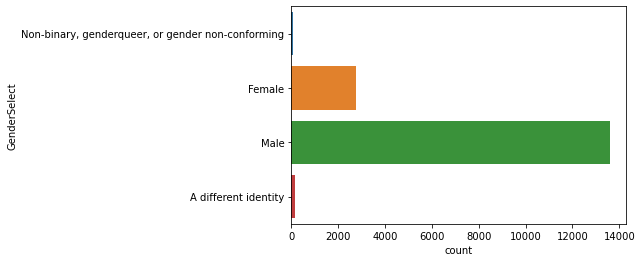

In [174]:
# mcq에서 남성과 여성의 비율을 seaborn을 사용하여 시각화한다
sns.countplot(y='GenderSelect', data=mcq)
# GenderSelect 칼럼에서 여성보다는 남성의 응답자가 훨씬 많다는 것을 알 수 있다

In [175]:
# 국가별 응답수를 데이터 프레임으로 생성
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# con_df안에 국가라는 칼럼을 만들고 각 인덱스를 지정해준다
con_df['국가'] = con_df.index
#con_df의 칼럼명을 바꿔준다
con_df.columns = ['응답 수', '국가']
# reset_index()를 통하여 기본 인덱스 값을 칼럼으로 설정해준다
# drop함수를 사용하여 index칼럼을 삭제한다(axis=1은 열을 나타내고 axis=0을 행을 나타냄)
con_df = con_df.reset_index().drop('index', axis=1)
con_df['응답자 수'] = con_df['응답 수']
con_df = con_df.drop('응답 수', axis=1)
con_df.head(20)

,국가,응답자 수
0,United States,4197
1,India,2704
2,Other,1023
3,Russia,578
4,United Kingdom,535
5,People 's Republic of China,471
6,Brazil,465
7,Germany,460
8,France,442
9,Canada,440


In [176]:
# 연령에 대한 정보를 본다 describe() 사용
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [177]:
mcq[mcq['Age'] > 0]['Age']

1        30.0
2        28.0
3        56.0
4        38.0
5        46.0
         ... 
16711    24.0
16712    25.0
16713    25.0
16714    16.0
16715    27.0
Name: Age, Length: 16375, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

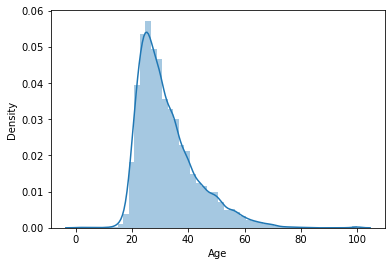

In [178]:
# 연령대를 distplot으로 나타냄 (0세 이상)
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

연령대를 보면 응답자의 평균은 30대이고, 응답자는 대부분 어리고 20대부터 급격하게 늘어나며 20~40대가 가장 많다

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

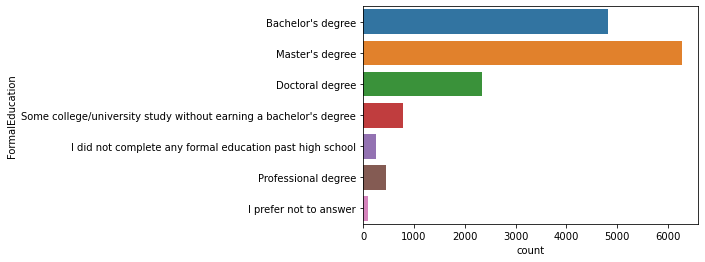

In [179]:
# 응답자의 학력을 시각화한다
sns.countplot(y='FormalEducation', data=mcq)

학사학위를 가진 사람보다 석사학위를 가진 사람이 많고, 박사학위를 가진 사람도 많다

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

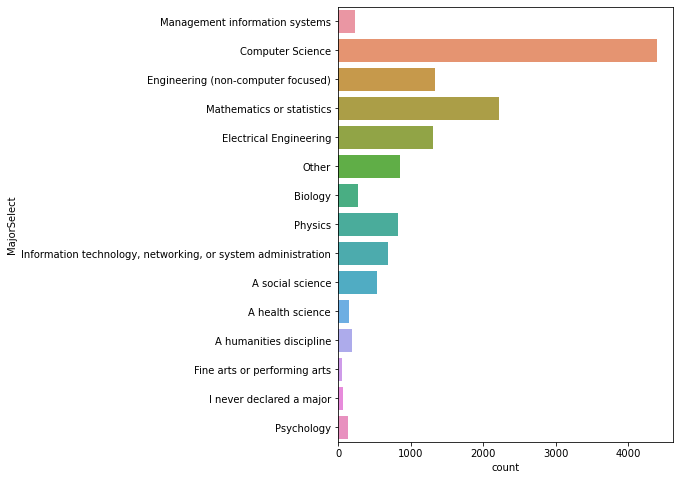

In [180]:
# 응답자의 전공 분포를 시각화 한다
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [181]:
# 응답자들의 전공비율을 시각화한다
# 응답자들의 전공을 value_counts()를 통하여 전공별 카운트 값을 나타낸다
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
# 응답자들의 전공을 value_counts()를 통하여 전공별 카운트 값의 비율을 나타낸다(normalize=True 파라미터를 통하여)
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
# 응답자들의 전공별 카운트와 전공별 비율을 하나의 데이터프레임으로 합친다(concat() 사용 axis=1(열) )
mcq_major_df = pd.concat([mcq_major_count, mcq_major_percent], axis=1)
# 칼럼의 명을 변경
mcq_major_df.columns=['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


응답자들의 전공중에 컴퓨터 사이언스가 가장 많고, 수학통계, 공학, 전기 순이다

In [182]:
#취업여부의 정보를 확인한다
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = pd.concat([mcq_es_count, mcq_es_percent], axis=1)
mcq_es_df.columns = ['응답자 수', '비율']
mcq_es_df

,응답자 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

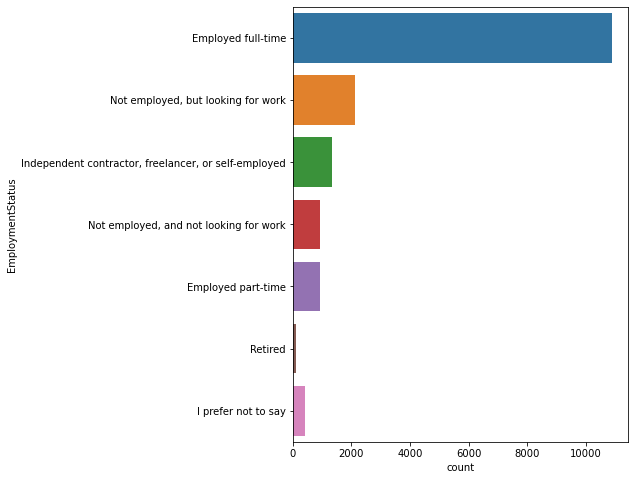

In [183]:
plt.figure(figsize=(6,8))
sns.countplot(y='EmploymentStatus', data=mcq)

현재 풀타임으로 일하고 있는 응답자가 65퍼센트로 가장 많고, 구직중인 응답자가 12퍼센트로 다음이다

<AxesSubplot:xlabel='count', ylabel='Tenure'>

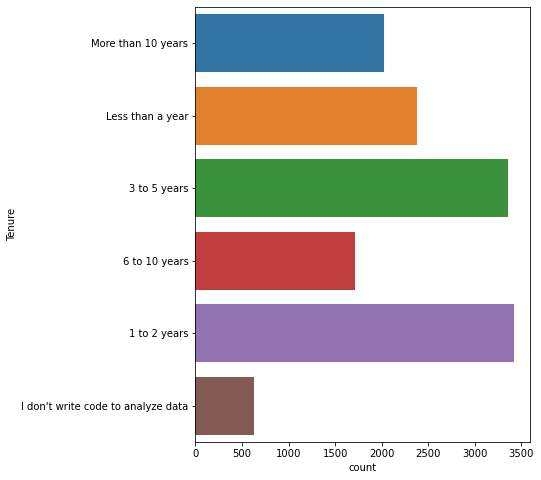

In [184]:
#응답자들의 프로그래밍 경험에 대한 정보이다
# tenure 항목은 프로그래밍 경험이 얼마나 되는지에 대한 질문이다
plt.figure(figsize=(6,8))
sns.countplot(y='Tenure', data=mcq)

응답자들의 대부분은 프로그래밍 경험이 5년 미만이고 1~2년 사이가 가장 많다

Text(0.5, 1.0, 'korean')

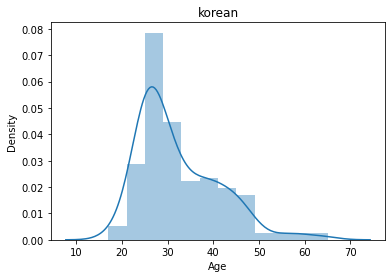

In [185]:
# 한국인 응답자의 연령정보 확인하기
korean = mcq.loc[mcq['Country'] == 'South Korea']
sns.distplot(korean['Age'].dropna())
plt.title('korean')

In [186]:
# 한국인 응답자의 성별정보 확인하기
pd.DataFrame(korean['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'korean')

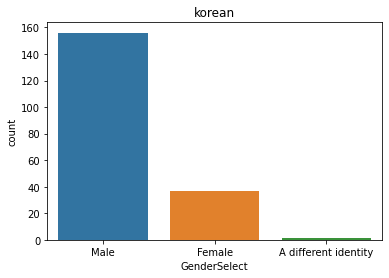

In [187]:
sns.countplot(x='GenderSelect', data=korean)
plt.title('korean')

Text(0.5, 1.0, 'korean Male')

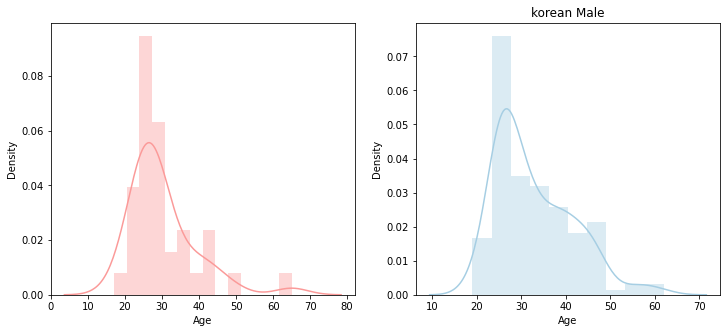

In [188]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korean['Age'].loc[korean['GenderSelect'] == 'Female'].dropna(), 
            norm_hist=False, color=sns.color_palette('Paired')[4], ax= ax1)
plt.title('korean Female')
sns.distplot(korean['Age'].loc[korean['GenderSelect'] == 'Male'].dropna(), 
            norm_hist=False, color=sns.color_palette('Paired')[0], ax= ax2)
plt.title('korean Male')

<h1> 자주 묻는 질문 FAQ </h1>

<h3> Q1. 어떤 언어를 배우는게 좋은가? </h3>

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

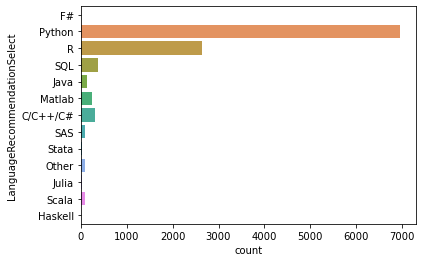

In [189]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬이 가장 많고 그 다음으로 R이 있다

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

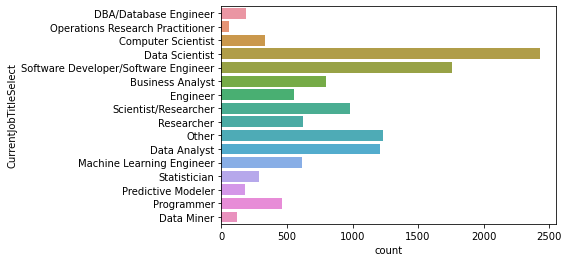

In [190]:
#현재 하고 있는 일
sns.countplot(y='CurrentJobTitleSelect', data=mcq)

현재 응답자들이 가장 많이 하고 있는 직업은 데이터사이언티스트, 소프트웨어 개발자 등등이다

In [191]:
# 현재 하고있는 일이 있는 응답자 수
mcq[mcq['CurrentJobTitleSelect'].notnull()].shape

(11830, 228)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

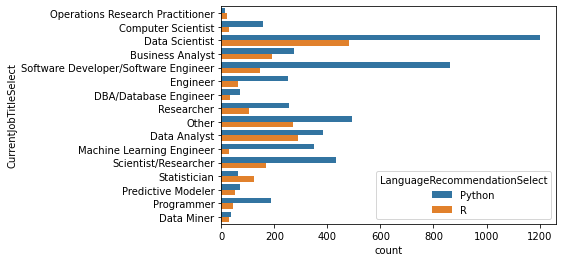

In [192]:
# 현재 하고있는 일이 있는 응답자 중에 Python 또는 R을 사용하는 응답자 7158명
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

현재 하고있는 일이 있는 응답자 중에 python 또는 R을 사용하는 응답자는 총 7158명이고
각 직업별 사용하는 언어는 대부분 python이 R보다 많이 사용되어 진다

<h3> Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요? </h3>

In [193]:
mcq_mlt_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_mlt_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_mlt_df = pd.concat([mcq_mlt_count, mcq_mlt_percent], axis=1)
mcq_mlt_df.columns = ['응답자 수', '비율']
mcq_mlt_df.head(20)

,응답자 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

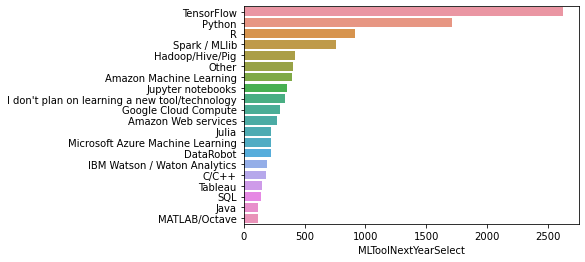

In [194]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했고, Python이 15%, R은 8%로 다음이다.

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

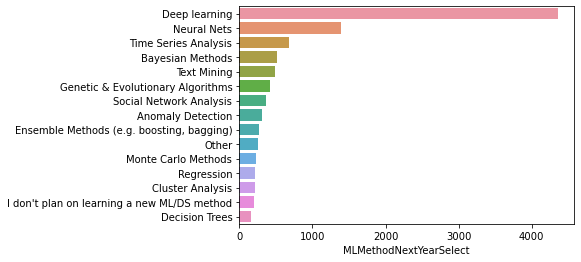

In [195]:
# 데이터 사이언스 method는 어떤것이 내년에 주목 받을까?
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

데이터 사이언스 method는 딥러닝이 가장 주목받을 것이라 응답하였고, 뉴럴네트워크, TSN등이 있다

<h3> Q3. 데이터 과학을 위해 높은 사양의 컴퓨터가 필요할까요? </h3>

In [196]:
# 질문내용과 누구에게 물어봤는지 찾아봄
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [197]:
# 해당 질문에 응답한 응답자 수
mcq['HardwarePersonalProjectsSelect'].dropna().shape

(4206,)

In [198]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [199]:
s = s[s != 'nan']

In [200]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 사람이 제일 많았고, 랩탑과 클라우드를 함께 사용하는 사람이 다음이다

<h3> Q4. 데이터 사이언스 공부에 얼마나 많은 시간을 투자하는지? </h3>

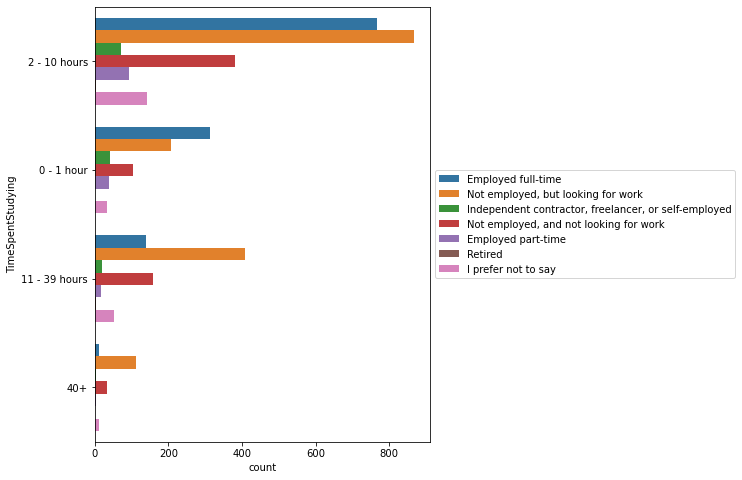

In [201]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

대부분 구직중인 사람들이 데이터 사이언스 공부에 많은 시간을 투자하고 있고, 재직중인 사람들 또한 많은 시간을 투자하고 있다

<h3> Q5. 데이터 사이언스의 평균 급여는 얼마나 될까? </h3>

In [202]:
# 평균 급여 칼럼의 응답자수를 확인
mcq['CompensationAmount'].notnull().sum()

5224

In [209]:
# 평균 급여에 있는 특수문자 제거
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('./DataSet/conversionRates.csv', index_col=0)
# mcq의 특정 칼럼만 복사해서 salary의 데이터프레임으로 만듬(결측치 제거)
salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 
              'CurrentJobTitleSelect', 'CurrentJobTitleSelect']].dropna()
# 아까 만든 salary와 환율정보 rates를 병합한다(나라를 기준으로 병합해야 하는데 두개의 칼럼 이름이 다르므로
# left_on, right_on을 지정, how는 left 즉 왼쪽을 기준으로 정렬한다)
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
# to_numeric함수를 사용하여 데이터타입을 숫자로 바꾼다
salary['salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,CurrentJobTitleSelect,originCountry,exchangeRate,salary
0,250000,USD,Male,United States,Operations Research Practitioner,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [208]:
print('Maximun Salary is USD $', salary['salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['salary'].replace('-', '').dropna().astype(int).min())

Maximun Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648


한국인 응답자 수:  26


<AxesSubplot:xlabel='salary', ylabel='GenderSelect'>

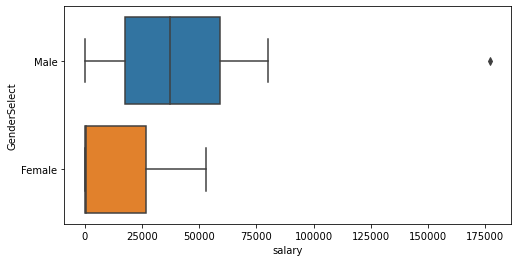

In [214]:
# 한국인들의 급여 정보만 모아둠
salary_korean = salary.loc[salary['Country'] == 'South Korea']
print('한국인 응답자 수: ', len(salary_korean))
plt.subplots(figsize=(8,4))
# 한국인들의 급여정보를 boxplot으로 시각화
sns.boxplot(y='GenderSelect', x='salary', data=salary_korean)


In [219]:
salary_korean_male = salary_korean.loc[salary_korean['GenderSelect'] == 'Male']
salary_korean_male['salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: salary, dtype: float64

In [241]:
#주관식 응답을 읽어옴
free = pd.read_csv('./DataSet/freeformResponses.csv')
print(ff.shape)
free.head(10)

(16716, 62)


,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,kdnuggets,Prepping data,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Stanford SNAP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
# 주관식 설문 내용이 무엇인지 알아본다
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
qc.Question.values[0]

'What is your biggest challenge with the public datasets you find for personal projects?'

개인프로젝트에서 공개된 데이터셋을 사용하는데 가장 어려운 점은 무엇인가요?

In [250]:
ppff = free['PersonalProjectsChallengeFreeForm'].value_counts().head(10)
ppff = pd.DataFrame(ppff)
ppff.rename(columns={'PersonalProjectsChallengeFreeForm':'응답자 수'}, inplace=True)
ppff

,응답자 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


대부분의 어려운점이 데이터 전처리와 결측값 처리라고 응답했다

<h3> Q6. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까? </h3>

In [257]:
qc = question.loc[question['Column'].str.contains('JobFactor')]
qc.Question.values

array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

<h3> Q7. 데이터 사이언티스트가 되기 위해 학위가 중요할까? </h3>

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

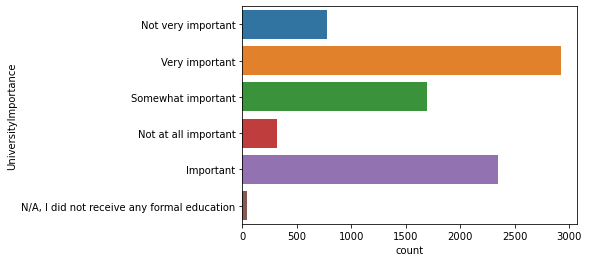

In [260]:
sns.countplot(y='UniversityImportance', data=mcq)

In [262]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

<h3> Q8. 어디서부터 데이터사이언스를 시작해야 할까요? </h3>

In [265]:
#해당 질문에 응답한 응답자 수
mcq['FirstTrainingSelect'].notnull().sum()

14712

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

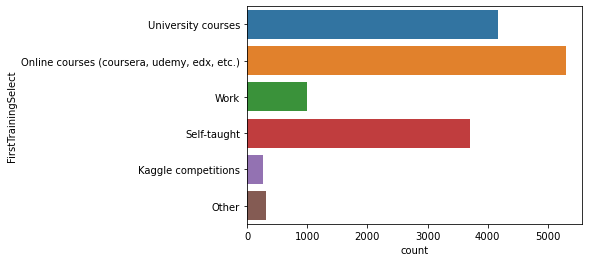

In [266]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

대부분의 응답자는 대학교육이 중요하다고 했지만 가장 많은 응답자는 코세라, 유데미등 온라인을 통해 데이터 사이언스를 공부했다고 한다

<h3> Q9. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요? </h3>

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

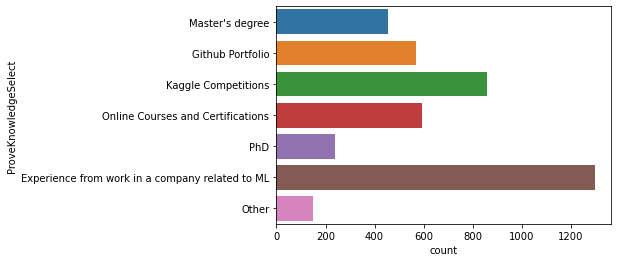

In [267]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

대부분의 응답자는 머신러닝과 관련된 직무경험이 가장 중요하다고 하였고, 다음으로는 캐글 경진대회가 중요하다고 하였다

<h3> Q10. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요? </h3>

In [274]:
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc.Question.values

array(['At which level do you understand the mathematics behind the algorithms you use at work?'],
      dtype=object)

In [275]:
mcq['AlgorithmUnderstandingLevel'].notnull().sum()

7410

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

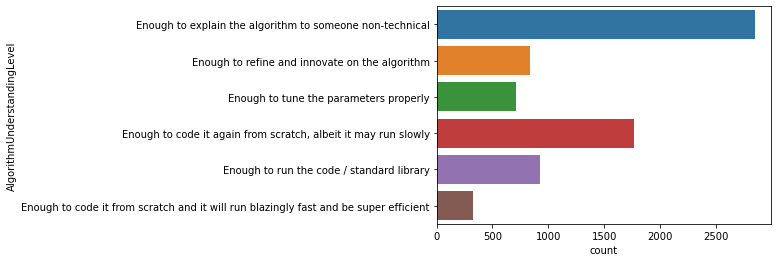

In [276]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

코딩업무를 하는 사람들에게 질문했을때, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는게 중요하다는 응답이 그 뒤를 있는다.

<h3> Q11. 어디에서 일을 찾아야 할까요? </h3>

In [278]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<AxesSubplot:title={'center':'Best places to look for a data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

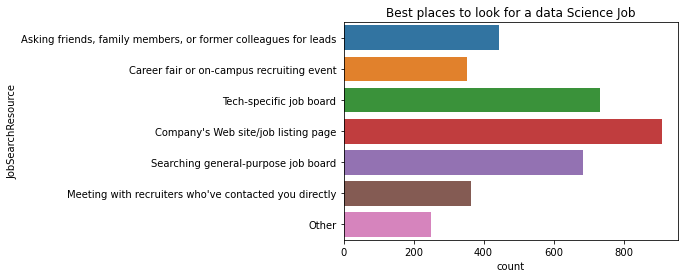

In [279]:
plt.title('Best places to look for a data Science Job')
sns.countplot(y='JobSearchResource', data=mcq)

회사 윕사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 정보를 얻는다

<AxesSubplot:title={'center':'Best places to look for a data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

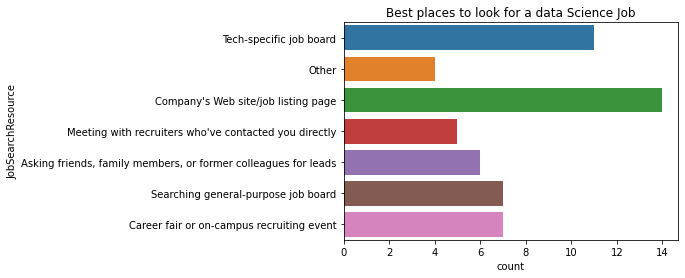

In [282]:
# 한국사람들의 경우는 어떨까?
plt.title('Best places to look for a data Science Job')
sns.countplot(y='JobSearchResource', data=korean)

<h1> 결론(위의 설문내용을 분석한 결과) </h1>

* 현업 데이터 사이언티스트들은 R보다 Python을 많이 사용하고 있다(하지만 R을 사용하는 사람들도 많다)
* 데이터를 전처리하는 과정이 제일 힘들다고 한다
